<a href="https://colab.research.google.com/github/coolmino96/Predicting-MPG/blob/master/%EA%B3%BC%EC%A0%9C2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Epoch 00001: val_loss improved from inf to 0.05715, saving model to ./model/mnist-01-0.0571.hdf5

Epoch 00002: val_loss improved from 0.05715 to 0.03891, saving model to ./model/mnist-02-0.0389.hdf5

Epoch 00003: val_loss improved from 0.03891 to 0.03715, saving model to ./model/mnist-03-0.0371.hdf5
313/313 [==============================] - 1s 4ms/step - loss: 0.0371 - accuracy: 0.9886

Accuracy: 0.9886


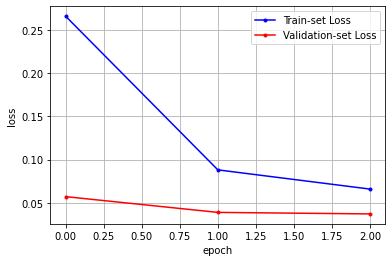

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import os
import numpy

MODEL_SAVE_FOLDER_PATH = './model/'

if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
  os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + 'mnist-' + '{epoch:02d}-{val_loss:.4f}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                verbose=1, save_best_only=True)

cb_early_stopping = EarlyStopping(monitor='val_loss', patience=10)

(X_train, Y_train), (X_validation, Y_validation) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_validation = X_validation.reshape(X_validation.shape[0], 28, 28, 1).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_validation = np_utils.to_categorical(Y_validation, 10)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    validation_data=(X_validation, Y_validation),
                    epochs=3, batch_size=200, verbose=0,
                    callbacks=[cb_checkpoint, cb_early_stopping])

print('\nAccuracy: {:.4f}'.format(model.evaluate(X_validation, Y_validation)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()



* 32개의 필터를 적용하였음
* 필터의 크기는 3*3
* 행열은 28*28로 흑백색상임
* 맥스 풀링은 정해진 영역 안에서 가장 큰 값만 남기고 나머지는 버리는 방식으로 pool_size는 풀링 윈도우 크기이며 2의 값은 전체 크기를 절반으로 줄임
* Dropout()는 특정 노드에 학습이 지나치게 몰리는 것을 방지하기 위해 랜덤하게 일부 노드를 꺼주는 역할을 하고 Dropout을 통해 과적합을 조금 더 효과적으로 회피할 수 있음.
* 실행 결과 현재 사용하고 있는 PC의 GPU 성능이 낮아 GPU 가속을 받을 수 없는 상황이라 epoch 값을 3으로 했더니 위와 같은 결과가 나왔습니다. 환경이 좋은데서는 epoch 값을 더 늘려서 좀 더 성능이 좋은 모델을 얻을 수 있을 것입니다.



